### Ejercicio N° 1

El dataset winequality-red.csv contiene un conjunto de variables relacionadas con propiedades fisicoquímicas que fueron determinadas sobre una serie de vinos de una misma variedad, así como un puntaje asignado en cada caso por un panel de enólogos en sesiones de cata. Importe el dataset al entorno de trabajo y realice cualquier tipo de limpieza y adecuación del mismo que considere necesaria para su posterior análisis.

In [4]:
import pandas as pd

In [10]:
data_wine = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Unidad3\Datasets\winequality-red.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data_wine.isna().sum() # no hay datos null

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
data_wine.info() # los formatos de los datos ya estan normalizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
data_wine.columns = data_wine.columns.str.replace(' ', '_') # solo se cambian los espacios de los nombres por _
data_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Clasifique las variables del dataset en cualitativas, cuantitativas discretas y cuantitativas continuas.**

In [35]:
data_wine.quality.unique() # variable cualitativa ordinal

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [49]:
data_wine.free_sulfur_dioxide.unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

Dada la información anterior impresa por la función .head() e .info(), parece que todas las columnas, salvo quality, son variables cuantitativas continuas

**El 25% de los vinos del dataset tiene un contenido de alcohol superior a… ¿qué valor?**

In [67]:
data_wine['alcohol'].quantile(0.25) # 25% tiene este valor o inferior

9.5

In [69]:
data_wine['alcohol'].quantile(0.75) # el tercer cuartil esta por encima de 9.5

11.1

**Realice una tabla en la que se presenten, para las variables densidad y pH, únicamente las siguientes medidas descriptivas: media, mediana, desvío estándar y rango intercuartil. A continuación, responda a las siguientes preguntas sin realizar ningún gráfico:**


¿Cómo describiría ambas distribuciones en relación a sus características de simetrí 


¿Cuál de los dos conjuntos de observaciones (densidad o pH) presenta mayor variabilidad?

In [93]:
densidad_ph_data = data_wine[['density','pH']]
medias = densidad_ph_data.mean()
mediana = densidad_ph_data.median()
desv_est = densidad_ph_data.std()
iqr = densidad_ph_data.quantile(0.75) - densidad_ph_data.quantile(0.25)

In [99]:
tabla_resumen = pd.DataFrame({
    'media': medias,
    'mediana': mediana,
    'desvío estándar': desv_est,
    'IQR': iqr
})
tabla_resumen

,media,mediana,desvío estándar,IQR
density,0.996747,0.99675,0.001887,0.002235
pH,3.311113,3.31000,0.154386,0.190000


Ya que en ambos casos la media y la mediana tienen valores similares, es probable que las dos tengan una distribución simétrica, del estilo normal. Por otro lado, pH tiene más variabilidad, dada la información sobre desvío y IQR.

**Represente la distribución de las observaciones de la variable contenido de alcohol (alcohol) a través de un boxplot. Sugerencia: utilice la función sns.boxplot() de la librería seaborn. Basándose en el gráfico, ¿cuál de las siguientes medidas de posición o centralidad (media aritmética/mediana) le parece más adecuada para describir a esta variable?**

In [143]:
data_boxplot = data_wine['alcohol']

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

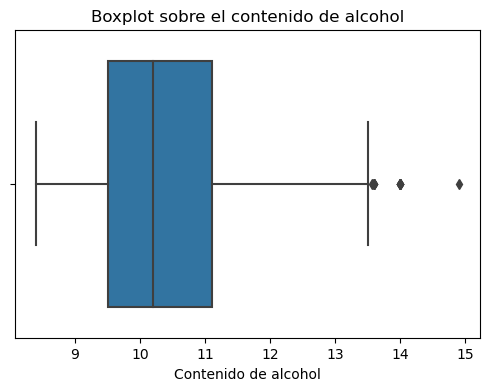

In [153]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data_boxplot)
plt.title('Boxplot sobre el contenido de alcohol')
plt.xlabel('Contenido de alcohol')
plt.show()

Teniendo en cuenta el boxplot resultante, esta variable posee al menos tres outliers (valores atípicos), por lo que la media aritmética podría verse afectada; no sería realmente representativa. Por lo tanto, la mediana, que es una medida más robusta, podría ser mejor para representar esta variable.

**Realice una tabla de frecuencias para resumir la distribución de los vinos del dataset en función del puntaje asignado según su calidad (quality).**

In [187]:
frec_qualit = data_wine['quality'].value_counts().reset_index()
frec_qualit.columns = ['Calificación', 'Frecuencia']
# Se agrega una columna para ver su frecuencia relativa en porcentajes
frec_qualit['Frecuencia relativa'] =  ((frec_qualit['Frecuencia'] / frec_qualit['Frecuencia'].sum()) * 100).round(2)
frec_qualit

,Calificación,Frecuencia,Frecuencia relativa
0,5,681,42.59
1,6,638,39.90
2,7,199,12.45
3,4,53,3.31
4,8,18,1.13
5,3,10,0.63


Teniendo en cuenta la tabla de frecuencias, el 42.59% de los vinos cargados obtuvieron una calificación de 5 estrellas y solo un 0.63%, solo tres estrellas.

### Ejercicio N° 2

El dataset alimentos.csv fue elaborado por una clínica de nutrición que suministró a sus pacientes una lista de alimentos permitidos con sus respectivos contenidos calóricos. También se detalló el tipo de alimento del que se trataba (fruta, verdura, etc.) y el tipo de vitamina que aportaba cada uno (A, B o C).

Por otra parte, la nutricionista a cargo del estudio lleva una planilla de control de la evolución de 50 pacientes (pacientes.csv) en la que registra la edad, el sexo, la altura, el peso inicial y el peso final de cada uno de ellos luego de seguir un plan de dieta por una cierta cantidad de tiempo, información que también fue registrada en el campo “tiempo de tratamiento”.

In [205]:
data_alim = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Unidad3\Datasets\alimentos.csv', encoding='latin1', sep=';')

In [211]:
data_pac = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Unidad3\Datasets\pacientes.csv', encoding='latin1', sep=';')

**Importe ambos datasets al entorno de trabajo y realice cualquier tarea de limpieza y/o adecuación de los mismos que considere necesaria.**

In [236]:
data_alim.alimento = data_alim.alimento.str.strip()

In [268]:
data_pac.altura_m = data_pac.altura_m.str.replace(',', '.')

In [272]:
data_pac.altura_m = data_pac.altura_m.astype('float')

**En relación al campo aporte_calorico_kcal informe las medidas descriptivas que le brinden información sobre los siguientes aspectos:**

Las kcal que aportan, en promedio, los alimentos que forman parte del dataset.

In [314]:
data_alim.groupby('alimento')['aporte_calorico_kcal'].mean().sort_values(ascending=False).reset_index()

,alimento,aporte_calorico_kcal
0,hamburguesa,954.0
1,chocolate con leche,864.0
2,pan de plátano,820.0
3,nuez,593.0
4,pizza,591.0
...,...,...
92,guayaba,9.0
93,rábano,6.0
94,calabaza,6.0
95,uva,5.0


Aquel valor de aporte calórico tal que el 50% de los alimentos del dataset presentan aportes calóricos menores o iguales a él.

In [304]:
data_alim['aporte_calorico_kcal'].median()

66.0

La dispersión o variabilidad del 50% central de las observaciones.

In [323]:
# Si se quiere ver la variabilidad de 50% de los datos, se debe buscar el IQR (rango intercuartílico)
q3 = data_alim['aporte_calorico_kcal'].quantile(0.75)
q1 = data_alim['aporte_calorico_kcal'].quantile(0.25)
q3-q1

62.0

El o los valores que se presentan con mayor frecuencia entre las observaciones.

In [333]:
data_alim['aporte_calorico_kcal'].mode()

0    20
1    75
Name: aporte_calorico_kcal, dtype: int64

**Represente la distribución de las observaciones de la variable aporte_calorico_kcal a través de un boxplot.**

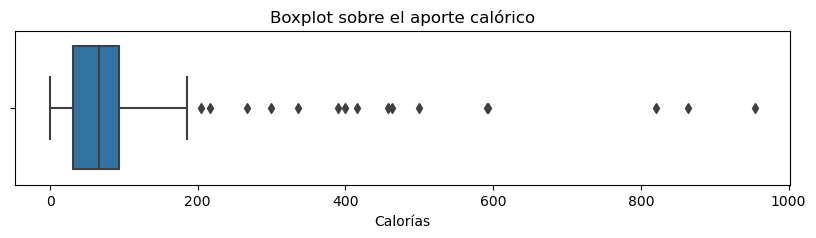

In [345]:
plt.figure(figsize=(10,2))
sns.boxplot(x=data_alim['aporte_calorico_kcal'])
plt.title('Boxplot sobre el aporte calórico')
plt.xlabel('Calorías')
plt.show()